In [1]:
# table https://colab.research.google.com/drive/1LO7mJBnkccfwlKUFX17rJONbf_tUEukC?usp=sharing
# game Pong 18.9 (1.3)

In [2]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from collections import deque
from utils import DQNbn, make_env, ReplayMemory, train

%matplotlib inline

In [3]:
env = gym.make("PongNoFrameskip-v4")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


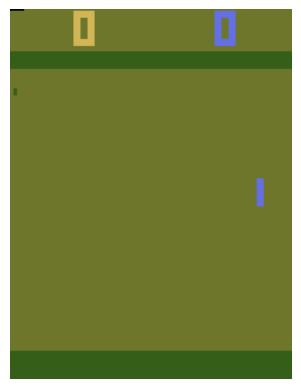

In [4]:
plt.imshow(env.reset()[0])
plt.axis("off")  # Убрать оси координат
plt.show()

In [5]:
env.reset()

n_actions = env.action_space.n
state_dim = env.observation_space.shape

print(f"Action_space: {n_actions} \nState_space: {env.observation_space.shape}")

env.close()

Action_space: 6 
State_space: (210, 160, 3)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
BATCH_SIZE = 32
GAMMA = 0.99
EPS_START = 1
EPS_END = 0.02
EPS_DECAY = 1000000
TARGET_UPDATE = 1000
RENDER = False
lr = 1e-4
INITIAL_MEMORY = 10000
MEMORY_SIZE = 10 * INITIAL_MEMORY

In [8]:
policy_net = DQNbn(n_actions=4).to(device)  # убираем действия с FIRE
target_net = DQNbn(n_actions=4).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

steps_done = 0

# create environment
env = gym.make("PongNoFrameskip-v4")
env = make_env(env)

memory = ReplayMemory(MEMORY_SIZE)

In [9]:
train(
    env=env,
    n_episodes=400,
    memory=memory,
    device=device,
    initial_memory=INITIAL_MEMORY,
    policy_net=policy_net,
    target_net=target_net,
    gamma=GAMMA,
    optimizer=optimizer,
    batch_size=BATCH_SIZE,
    target_update=TARGET_UPDATE,
    eps_end=EPS_END,
    eps_start=EPS_START,
    eps_decay=EPS_DECAY,
    render=False,
)
# torch.save(policy_net, "dqn_pong_model")
# policy_net = torch.load("dqn_pong_model")

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 1/400 [00:00<05:33,  1.20it/s]

Total steps: 818 	 Episode: 0/817 	 Total reward: -21.0


  0%|          | 2/400 [00:01<06:08,  1.08it/s]

Total steps: 1809 	 Episode: 1/990 	 Total reward: -20.0


  1%|          | 3/400 [00:05<13:42,  2.07s/it]

Total steps: 2809 	 Episode: 2/999 	 Total reward: -21.0


  1%|          | 4/400 [00:06<10:57,  1.66s/it]

Total steps: 3739 	 Episode: 3/929 	 Total reward: -20.0


  1%|▏         | 5/400 [00:07<09:15,  1.41s/it]

Total steps: 4584 	 Episode: 4/844 	 Total reward: -21.0


  2%|▏         | 6/400 [00:08<08:41,  1.32s/it]

Total steps: 5519 	 Episode: 5/934 	 Total reward: -21.0


  2%|▏         | 7/400 [00:09<07:57,  1.22s/it]

Total steps: 6401 	 Episode: 6/881 	 Total reward: -21.0


  2%|▏         | 8/400 [00:10<07:26,  1.14s/it]

Total steps: 7240 	 Episode: 7/838 	 Total reward: -20.0


  2%|▏         | 9/400 [00:11<06:52,  1.06s/it]

Total steps: 8090 	 Episode: 8/849 	 Total reward: -21.0


  2%|▎         | 10/400 [00:12<07:08,  1.10s/it]

Total steps: 9122 	 Episode: 9/1031 	 Total reward: -20.0


/home/p1dg/MFTI_DS/rl/hw_2_atari_games/utils.py:366: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  next_state_values[non_final_mask] = (
  3%|▎         | 11/400 [00:16<13:15,  2.04s/it]

Total steps: 10210 	 Episode: 10/1087 	 Total reward: -21.0


  3%|▎         | 12/400 [00:26<28:19,  4.38s/it]

Total steps: 10965 	 Episode: 11/754 	 Total reward: -21.0


  3%|▎         | 13/400 [00:36<39:39,  6.15s/it]

Total steps: 11785 	 Episode: 12/819 	 Total reward: -21.0


  4%|▎         | 14/400 [00:47<48:04,  7.47s/it]

Total steps: 12623 	 Episode: 13/837 	 Total reward: -20.0


  4%|▍         | 15/400 [00:59<57:35,  8.97s/it]

Total steps: 13601 	 Episode: 14/977 	 Total reward: -20.0


  4%|▍         | 16/400 [01:13<1:07:16, 10.51s/it]

Total steps: 14696 	 Episode: 15/1094 	 Total reward: -20.0


  4%|▍         | 17/400 [01:25<1:08:48, 10.78s/it]

Total steps: 15581 	 Episode: 16/884 	 Total reward: -21.0


  4%|▍         | 18/400 [01:38<1:14:31, 11.71s/it]

Total steps: 16577 	 Episode: 17/995 	 Total reward: -19.0


  5%|▍         | 19/400 [01:49<1:11:51, 11.32s/it]

Total steps: 17364 	 Episode: 18/786 	 Total reward: -21.0


  5%|▌         | 20/400 [02:01<1:13:31, 11.61s/it]

Total steps: 18373 	 Episode: 19/1008 	 Total reward: -20.0


  5%|▌         | 21/400 [02:12<1:12:22, 11.46s/it]

Total steps: 19298 	 Episode: 20/924 	 Total reward: -20.0


  6%|▌         | 22/400 [02:25<1:15:38, 12.01s/it]

Total steps: 20349 	 Episode: 21/1050 	 Total reward: -18.0


  6%|▌         | 23/400 [02:36<1:12:14, 11.50s/it]

Total steps: 21188 	 Episode: 22/838 	 Total reward: -20.0


  6%|▌         | 24/400 [02:46<1:10:20, 11.23s/it]

Total steps: 22036 	 Episode: 23/847 	 Total reward: -21.0


  6%|▋         | 25/400 [02:58<1:09:55, 11.19s/it]

Total steps: 22951 	 Episode: 24/914 	 Total reward: -20.0


  6%|▋         | 26/400 [03:11<1:13:15, 11.75s/it]

Total steps: 24016 	 Episode: 25/1064 	 Total reward: -21.0


  7%|▋         | 27/400 [03:24<1:15:25, 12.13s/it]

Total steps: 24990 	 Episode: 26/973 	 Total reward: -20.0


  7%|▋         | 28/400 [03:34<1:11:28, 11.53s/it]

Total steps: 25836 	 Episode: 27/845 	 Total reward: -21.0


  7%|▋         | 29/400 [03:46<1:13:16, 11.85s/it]

Total steps: 26742 	 Episode: 28/905 	 Total reward: -21.0


  8%|▊         | 30/400 [03:58<1:13:06, 11.86s/it]

Total steps: 27652 	 Episode: 29/909 	 Total reward: -21.0


  8%|▊         | 31/400 [04:10<1:12:44, 11.83s/it]

Total steps: 28528 	 Episode: 30/875 	 Total reward: -21.0


  8%|▊         | 32/400 [04:21<1:10:37, 11.52s/it]

Total steps: 29346 	 Episode: 31/817 	 Total reward: -21.0


  8%|▊         | 33/400 [04:33<1:11:41, 11.72s/it]

Total steps: 30258 	 Episode: 32/911 	 Total reward: -21.0


  8%|▊         | 34/400 [04:45<1:12:37, 11.91s/it]

Total steps: 31199 	 Episode: 33/940 	 Total reward: -20.0


  9%|▉         | 35/400 [05:00<1:17:56, 12.81s/it]

Total steps: 32368 	 Episode: 34/1168 	 Total reward: -21.0


  9%|▉         | 36/400 [05:13<1:17:07, 12.71s/it]

Total steps: 33338 	 Episode: 35/969 	 Total reward: -21.0


  9%|▉         | 37/400 [05:26<1:18:02, 12.90s/it]

Total steps: 34336 	 Episode: 36/997 	 Total reward: -21.0


 10%|▉         | 38/400 [05:36<1:12:47, 12.07s/it]

Total steps: 35094 	 Episode: 37/757 	 Total reward: -21.0


 10%|▉         | 39/400 [05:51<1:16:56, 12.79s/it]

Total steps: 36230 	 Episode: 38/1135 	 Total reward: -20.0


 10%|█         | 40/400 [06:03<1:16:12, 12.70s/it]

Total steps: 37205 	 Episode: 39/974 	 Total reward: -20.0


 10%|█         | 41/400 [06:15<1:14:29, 12.45s/it]

Total steps: 38137 	 Episode: 40/931 	 Total reward: -21.0


 10%|█         | 42/400 [06:26<1:12:18, 12.12s/it]

Total steps: 39016 	 Episode: 41/878 	 Total reward: -21.0


 11%|█         | 43/400 [06:37<1:08:54, 11.58s/it]

Total steps: 39833 	 Episode: 42/816 	 Total reward: -21.0


 11%|█         | 44/400 [06:51<1:14:26, 12.55s/it]

Total steps: 40922 	 Episode: 43/1088 	 Total reward: -21.0


 11%|█▏        | 45/400 [07:06<1:17:07, 13.03s/it]

Total steps: 41948 	 Episode: 44/1025 	 Total reward: -21.0


 12%|█▏        | 46/400 [07:21<1:21:51, 13.88s/it]

Total steps: 43119 	 Episode: 45/1170 	 Total reward: -20.0


 12%|█▏        | 47/400 [07:34<1:18:45, 13.39s/it]

Total steps: 44067 	 Episode: 46/947 	 Total reward: -21.0


 12%|█▏        | 48/400 [07:48<1:19:28, 13.55s/it]

Total steps: 45128 	 Episode: 47/1060 	 Total reward: -21.0


 12%|█▏        | 49/400 [07:58<1:14:00, 12.65s/it]

Total steps: 45950 	 Episode: 48/821 	 Total reward: -21.0


 12%|█▎        | 50/400 [08:13<1:16:47, 13.16s/it]

Total steps: 47071 	 Episode: 49/1120 	 Total reward: -19.0


 13%|█▎        | 51/400 [08:24<1:14:19, 12.78s/it]

Total steps: 47945 	 Episode: 50/873 	 Total reward: -21.0


 13%|█▎        | 52/400 [08:41<1:20:16, 13.84s/it]

Total steps: 49121 	 Episode: 51/1175 	 Total reward: -20.0


 13%|█▎        | 53/400 [08:53<1:17:12, 13.35s/it]

Total steps: 49998 	 Episode: 52/876 	 Total reward: -21.0


 14%|█▎        | 54/400 [09:06<1:15:37, 13.11s/it]

Total steps: 50976 	 Episode: 53/977 	 Total reward: -20.0


 14%|█▍        | 55/400 [09:17<1:12:02, 12.53s/it]

Total steps: 51855 	 Episode: 54/878 	 Total reward: -21.0


 14%|█▍        | 56/400 [09:32<1:17:12, 13.47s/it]

Total steps: 53082 	 Episode: 55/1226 	 Total reward: -18.0


 14%|█▍        | 57/400 [09:44<1:13:18, 12.82s/it]

Total steps: 53997 	 Episode: 56/914 	 Total reward: -21.0


 14%|█▍        | 58/400 [09:54<1:08:43, 12.06s/it]

Total steps: 54819 	 Episode: 57/821 	 Total reward: -21.0


 15%|█▍        | 59/400 [10:06<1:08:32, 12.06s/it]

Total steps: 55774 	 Episode: 58/954 	 Total reward: -20.0


 15%|█▌        | 60/400 [10:18<1:08:13, 12.04s/it]

Total steps: 56657 	 Episode: 59/882 	 Total reward: -21.0


 15%|█▌        | 61/400 [10:30<1:07:54, 12.02s/it]

Total steps: 57563 	 Episode: 60/905 	 Total reward: -21.0


 16%|█▌        | 62/400 [10:42<1:07:07, 11.92s/it]

Total steps: 58476 	 Episode: 61/912 	 Total reward: -21.0


 16%|█▌        | 63/400 [10:53<1:06:13, 11.79s/it]

Total steps: 59315 	 Episode: 62/838 	 Total reward: -21.0


 16%|█▌        | 64/400 [11:05<1:06:53, 11.94s/it]

Total steps: 60257 	 Episode: 63/941 	 Total reward: -21.0


 16%|█▋        | 65/400 [11:17<1:06:39, 11.94s/it]

Total steps: 61192 	 Episode: 64/934 	 Total reward: -21.0


 16%|█▋        | 66/400 [11:31<1:09:50, 12.55s/it]

Total steps: 62281 	 Episode: 65/1088 	 Total reward: -18.0


 17%|█▋        | 67/400 [11:47<1:15:27, 13.60s/it]

Total steps: 63464 	 Episode: 66/1182 	 Total reward: -21.0


 17%|█▋        | 68/400 [12:02<1:16:41, 13.86s/it]

Total steps: 64528 	 Episode: 67/1063 	 Total reward: -20.0


 17%|█▋        | 69/400 [12:14<1:13:40, 13.36s/it]

Total steps: 65455 	 Episode: 68/926 	 Total reward: -20.0


 18%|█▊        | 70/400 [12:26<1:10:56, 12.90s/it]

Total steps: 66380 	 Episode: 69/924 	 Total reward: -21.0


 18%|█▊        | 71/400 [12:37<1:07:33, 12.32s/it]

Total steps: 67226 	 Episode: 70/845 	 Total reward: -21.0


 18%|█▊        | 72/400 [12:53<1:13:50, 13.51s/it]

Total steps: 68512 	 Episode: 71/1285 	 Total reward: -20.0


 18%|█▊        | 73/400 [13:06<1:12:45, 13.35s/it]

Total steps: 69512 	 Episode: 72/999 	 Total reward: -21.0


 18%|█▊        | 74/400 [13:19<1:11:25, 13.15s/it]

Total steps: 70485 	 Episode: 73/972 	 Total reward: -21.0


 19%|█▉        | 75/400 [13:30<1:08:15, 12.60s/it]

Total steps: 71365 	 Episode: 74/879 	 Total reward: -21.0


 19%|█▉        | 76/400 [13:43<1:08:16, 12.64s/it]

Total steps: 72375 	 Episode: 75/1009 	 Total reward: -19.0


 19%|█▉        | 77/400 [14:00<1:15:57, 14.11s/it]

Total steps: 73749 	 Episode: 76/1373 	 Total reward: -18.0


 20%|█▉        | 78/400 [14:17<1:20:14, 14.95s/it]

Total steps: 75065 	 Episode: 77/1315 	 Total reward: -18.0


 20%|█▉        | 79/400 [14:34<1:22:12, 15.36s/it]

Total steps: 76350 	 Episode: 78/1284 	 Total reward: -18.0


 20%|██        | 80/400 [14:44<1:14:05, 13.89s/it]

Total steps: 77170 	 Episode: 79/819 	 Total reward: -21.0


 20%|██        | 81/400 [14:59<1:14:47, 14.07s/it]

Total steps: 78296 	 Episode: 80/1125 	 Total reward: -20.0


 20%|██        | 82/400 [15:10<1:10:15, 13.25s/it]

Total steps: 79172 	 Episode: 81/875 	 Total reward: -21.0


 21%|██        | 83/400 [15:23<1:09:44, 13.20s/it]

Total steps: 80171 	 Episode: 82/998 	 Total reward: -21.0


 21%|██        | 84/400 [15:38<1:12:00, 13.67s/it]

Total steps: 81276 	 Episode: 83/1104 	 Total reward: -18.0


 21%|██▏       | 85/400 [15:53<1:14:53, 14.26s/it]

Total steps: 82421 	 Episode: 84/1144 	 Total reward: -21.0


 22%|██▏       | 86/400 [16:06<1:11:46, 13.71s/it]

Total steps: 83391 	 Episode: 85/969 	 Total reward: -20.0


 22%|██▏       | 87/400 [16:20<1:13:00, 13.99s/it]

Total steps: 84564 	 Episode: 86/1172 	 Total reward: -19.0


 22%|██▏       | 88/400 [16:35<1:13:47, 14.19s/it]

Total steps: 85697 	 Episode: 87/1132 	 Total reward: -19.0


 22%|██▏       | 89/400 [16:50<1:15:05, 14.49s/it]

Total steps: 86820 	 Episode: 88/1122 	 Total reward: -20.0


 22%|██▎       | 90/400 [17:06<1:17:18, 14.96s/it]

Total steps: 88049 	 Episode: 89/1228 	 Total reward: -18.0


 23%|██▎       | 91/400 [17:24<1:20:29, 15.63s/it]

Total steps: 89353 	 Episode: 90/1303 	 Total reward: -21.0


 23%|██▎       | 92/400 [17:38<1:18:35, 15.31s/it]

Total steps: 90456 	 Episode: 91/1102 	 Total reward: -21.0


 23%|██▎       | 93/400 [17:54<1:18:58, 15.44s/it]

Total steps: 91642 	 Episode: 92/1185 	 Total reward: -19.0


 24%|██▎       | 94/400 [18:09<1:18:25, 15.38s/it]

Total steps: 92795 	 Episode: 93/1152 	 Total reward: -20.0


 24%|██▍       | 95/400 [18:23<1:15:13, 14.80s/it]

Total steps: 93795 	 Episode: 94/999 	 Total reward: -21.0


 24%|██▍       | 96/400 [18:34<1:09:55, 13.80s/it]

Total steps: 94625 	 Episode: 95/829 	 Total reward: -20.0


In [ ]:
torch.save(policy_net, "dqn_pong_model")
policy_net = torch.load("dqn_pong_model")